In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read in the file with the data and place it in a Dataframe
Data_1 = pd.read_csv("Time_Data1.csv")
# drop the empty cells of data
Data_1 = Data_1.dropna(axis='columns')
# show only the first three columns
Data_1 = Data_1.iloc[:,0:3]
# Show the dataframe
#Data_1

In [2]:
# create a read_time_string function that takes 's' as an argument
def read_time_string(s):
    # split the 's' argument by the spaces and place in a column called times as an array
    times = s.split()
    # define four variables and set to 0
    days,hours,mins,secs = 0,0,0,0
    # for loop that goes through the entire times column array and checks whether each element should be put in a days, hours, minutes, or seconds column
    for i in range(len(times)-1):
        # check whether the element is equal to 'days', change the string to an int and place it in a days variable
        if times[i+1] == 'days':
            days = int(times[i])
        # check whether the element is equal to 'hours', change the string to an int and place it in a hours variable
        if times[i+1] == 'hours':
            hours = int(times[i])
        # check whether the element is equal to 'minutes', change the string to an int and place it in a minutes variable
        if times[i+1] == 'minutes':
            mins = int(times[i])
        # check whether the element is equal to 'seconds', change the string to an int and place it in a days variable
        if times[i+1] == 'seconds':
            secs = int(times[i])
    # Calulate the total seconds of each row it took to open the email
    total = secs + (mins*60) + (hours*3600) + (days*86400)
    return days,hours,mins,secs,total

In [7]:
Data_1["Username"]= Data_1["Email"].str.split("@", n = 1, expand = True)
Data_1

,Email,Date Accessed,Time to Open,Username
0,ccaso13,10/10/18 14:12,2 hours 28 minutes 47 seconds,ccaso13
1,scubus1,10/12/18 12:29,2 days 30 minutes 47 seconds,scubus1
2,jeffery.kinlaw,10/10/18 11:56,04 seconds,jeffery.kinlaw
3,bsteele,10/10/18 16:30,3 hours 54 minutes 56 seconds,bsteele
4,allstarpt,10/10/18 16:34,4 hours 35 minutes 17 seconds,allstarpt
5,atcdig24,10/10/18 12:30,5 minutes 57 seconds,atcdig24
6,bbasista,10/11/18 8:02,20 hours 6 minutes 21 seconds,bbasista
7,bfs6,10/10/18 13:55,1 hours 57 minutes 28 seconds,bfs6
8,blaronde,10/10/18 22:16,10 hours 17 minutes 57 seconds,blaronde
9,bwestereng,10/10/18 13:53,1 hours 58 minutes 37 seconds,bwestereng


In [30]:
# initialize four new variables equal to empty lists
Days,Hours,Mins,Secs,total_time = [],[],[],[],[]
# for loop to go through the column 'Time to Open'
for x in Data_1['Time to Open']:
    # set new variables equal to the data given when you call the read_time_string function
    d,h,m,s,t = read_time_string(x)
    # Add elements in variable d to the end of the Days list
    Days.append(d)
    # Add elements in variable h to the end of the Hours list
    Hours.append(h)
    # Add elements in variable m to the end of the Mins list
    Mins.append(m)
    # Add elements in variable s to the end of the Secs list
    Secs.append(s)
    # Add elements in variable t to the end of the totaL_time list
    total_time.append(int(t))

# Add the Days column to the original Data_1 dataframe    
Data_1['Days'] = pd.Series(Days)
# Add the Hours column to the original Data_1 dataframe 
Data_1['Hours'] = pd.Series(Hours)
# Add the Mins column to the original Data_1 dataframe 
Data_1['Mins'] = pd.Series(Mins)
# Add the Secs column to the original Data_1 dataframe 
Data_1['Secs'] = pd.Series(Secs)
# Add the total_time column to the original Data_1 dataframe 
Data_1['Total Seconds'] = pd.Series(total_time)

# define new function analyze that takes in a row as an argument
def analyze10(row):
    # check whether the element in a row in the 'Total Seconds' column is <= 20 seconds
    if row['Total Seconds'] <= 10:
        # return True if <= 10 seconds
        return True
    # return False if > 10 seconds
    return False

# define new function analyze that takes in a row as an argument
def analyze20(row):
    # check whether the element in a row in the 'Total Seconds' column is <= 20 seconds
    if row['Total Seconds'] <= 20 & row['Total Seconds'] > 10:
        # return True if <= 10 seconds
        return True
    # return False if > 10 seconds
    return False

# create a new column in Data_1 called 'Bot' by using lambda to call the function analyze on all rows to place either True or False in the column, 'Bot'
Data_1['Definitely a Bot'] = Data_1.apply(lambda row: analyze10(row),axis=1)

# create a new column in Data_1 called 'Bot' by using lambda to call the function analyze on all rows to place either True or False in the column, 'Bot'
Data_1['Probably a Bot'] = Data_1.apply(lambda row: analyze20(row),axis=1)

# print Data_1 to check that it worked
print(Data_1.head())

                              Email   Date Accessed  \
0               ccaso13@hotmail.com  10/10/18 14:12   
1                 scubus1@yahoo.com  10/12/18 12:29   
2  jeffery.kinlaw@robeson.k12.nc.us  10/10/18 11:56   
3                bsteele@uidaho.edu  10/10/18 16:30   
4                 allstarpt@msn.com  10/10/18 16:34   

                     Time to Open  Days  Hours  Mins  Secs  Total Seconds  \
0   2 hours 28 minutes 47 seconds     0      2    28    47           8927   
1    2 days 30 minutes 47 seconds     2      0    30    47         174647   
2                      04 seconds     0      0     0     4              4   
3   3 hours 54 minutes 56 seconds     0      3    54    56          14096   
4   4 hours 35 minutes 17 seconds     0      4    35    17          16517   

     Bot  Definitely a Bot  Probably a Bot  
0  False             False           False  
1  False             False           False  
2   True              True           False  
3  False             False

In [35]:
# calculate the total amount of trues in the Bots column
total_true = np.sum(Data_1['Definitely a Bot'])
# calculate the total amount of falses in the Bots column
total_false = len(Data_1['Definitely a Bot'])-total_true

# calculate the total amount of trues in the Bots column
total_true2 = np.sum(Data_1['Probably a Bot'])
# calculate the total amount of falses in the Bots column
total_false2 = len(Data_1['Probably a Bot'])-total_true2

print(total_true)
print(total_false)

print(total_true2)
print(total_false2)


86
945
5
1026


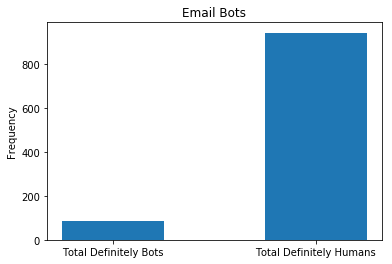

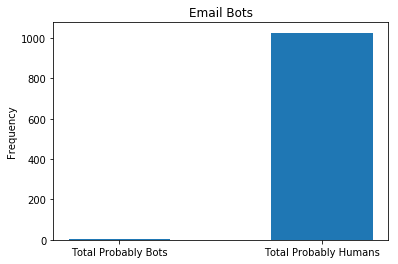

In [37]:
plt.bar([1,2],[total_true,total_false],.5,align='center')
# .5 is the bar thickness
# [1,2] is just positioning
objects = ['Total Definitely Bots','Total Definitely Humans']
plt.xticks([1,2],objects)
plt.ylabel('Frequency')
plt.title('Email Bots')
plt.show()

plt.bar([1,2],[total_true2,total_false2],.5,align='center')
# .5 is the bar thickness
# [1,2] is just positioning
objects = ['Total Probably Bots','Total Probably Humans']
plt.xticks([1,2],objects)
plt.ylabel('Frequency')
plt.title('Email Bots')
plt.show()